<ipython-input-5-959928d4149a>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = train.append(test, ignore_index=True)


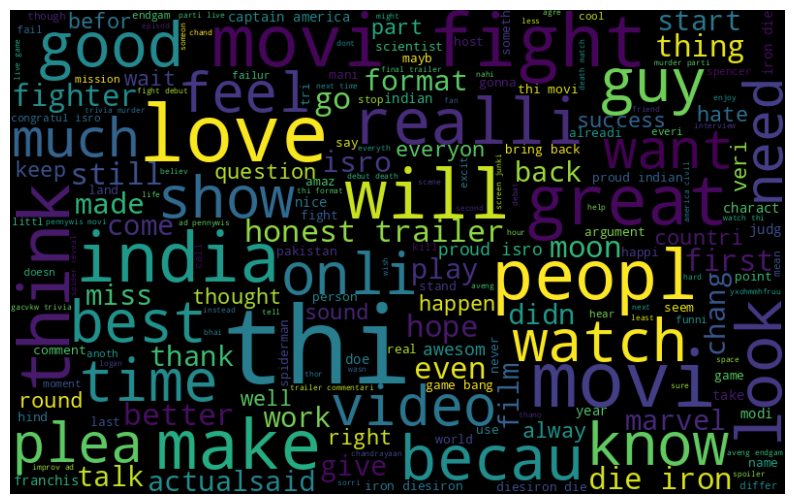

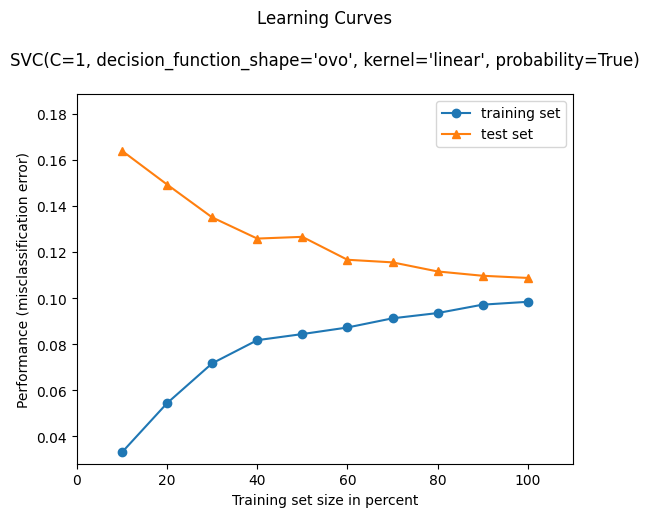

--------------------------------------------Results--------------------------------------------

     F1 Score =  0.8934485241180705

     Confusion Matrix of Model

[[2249  193]
 [ 399 2482]]



<ipython-input-5-959928d4149a>:64: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)


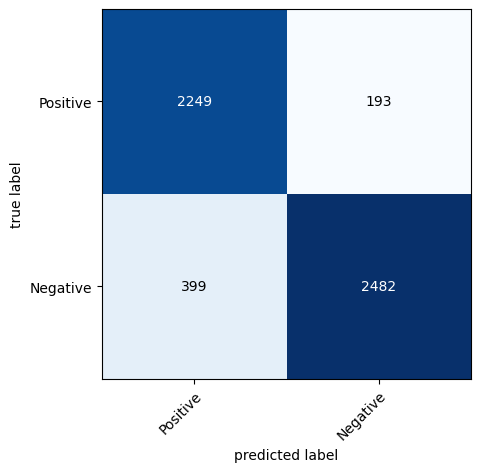

--------Classification Report--------------

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      2442
           1       0.93      0.86      0.89      2881

    accuracy                           0.89      5323
   macro avg       0.89      0.89      0.89      5323
weighted avg       0.89      0.89      0.89      5323



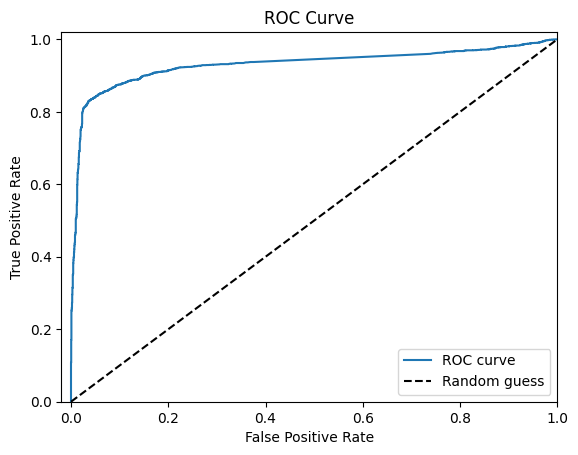


     ROC_AUC_SCORE =  0.9301895613072289


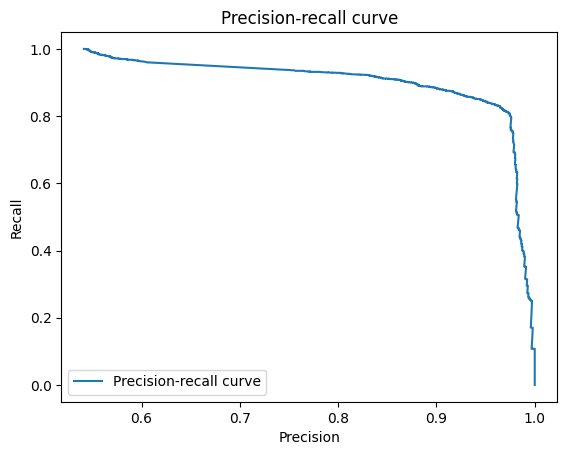


     Average_Precision_Score =  0.9517305571400422

     Accuracy score =  0.8887845200075145


In [5]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, average_precision_score, precision_recall_curve,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from mlxtend.plotting import plot_confusion_matrix, plot_learning_curves
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

def load_data(file_path):
    return pd.read_csv(file_path)

def preprocess_text(text):
    text = re.sub("[^a-zA-Z#]", " ", text)
    text = ' '.join([w for w in text.split() if len(w) > 3])
    return text

def tokenize_and_stem(text):
    stemmer = PorterStemmer()
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

def main():
    train = load_data("train.csv")
    test = load_data("test.csv")

    train['Comment'] = train['Comment'].fillna("")
    test['Comment'] = test['Comment'].fillna("")

    combi = train.append(test, ignore_index=True)

    combi['Comment'] = combi['Comment'].apply(preprocess_text)
    combi['Comment'] = combi['Comment'].apply(tokenize_and_stem)

    all_words = ' '.join([text for text in combi['Comment']])
    plot_wordcloud(all_words)

    bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
    bow = bow_vectorizer.fit_transform(combi['Comment'])

    train_bow = bow[:17741, :]
    test_bow = bow[17742:, :]

    xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['polarity'], random_state=42, test_size=0.3)

    svc = svm.SVC(kernel='linear', C=1, probability=True, decision_function_shape='ovo').fit(xtrain_bow, ytrain)

    plot_learning_curves(xtrain_bow, ytrain, xvalid_bow, yvalid, svc)
    plt.show()

    prediction = svc.predict_proba(xvalid_bow)
    prediction_int = prediction[:, 1] >= 0.3
    prediction_int = prediction_int.astype(np.int)

    # Calculate and visualize results
    print("--------------------------------------------Results--------------------------------------------")
    print()
    print("     F1 Score = ", f1_score(yvalid, prediction_int))
    print()
    print("     Confusion Matrix of Model")
    print()
    print(confusion_matrix(yvalid, prediction_int))
    print()

    confusion_mat = confusion_matrix(yvalid, prediction_int)
    class_names = ['Positive', 'Negative']

    fig, ax = plot_confusion_matrix(conf_mat=confusion_mat, class_names=class_names)
    plt.show()

    print("--------Classification Report--------------")
    print()
    print(classification_report(yvalid, prediction_int))

    y_pred_prob = svc.predict_proba(xvalid_bow)[:, 1]

    fpr, tpr, thresholds = roc_curve(yvalid, y_pred_prob)
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    _ = plt.xlabel('False Positive Rate')
    _ = plt.ylabel('True Positive Rate')
    _ = plt.title('ROC Curve')
    _ = plt.xlim([-0.02, 1])
    _ = plt.ylim([0, 1.02])
    _ = plt.legend(loc="lower right")
    plt.show()

    print()
    print("     ROC_AUC_SCORE = ", roc_auc_score(yvalid, y_pred_prob))

    precision, recall, thresholds = precision_recall_curve(yvalid, y_pred_prob)
    plt.plot(precision, recall, label='Precision-recall curve')
    _ = plt.xlabel('Precision')
    _ = plt.ylabel('Recall')
    _ = plt.title('Precision-recall curve')
    _ = plt.legend(loc="lower left")
    plt.show()

    print()
    print("     Average_Precision_Score = ", average_precision_score(yvalid, y_pred_prob))

    acc_score = accuracy_score(yvalid, prediction_int)
    print()
    print("     Accuracy score = ", acc_score)

if __name__ == "__main__":
    main()


Step 1 : Loading Training and Test Dataset


Summary of Training data


           Video ID               Title Comment      polarity
count         17741               17741   17611  17741.000000
unique           35                  34   16699           NaN
top     5xyNqemLNxk  Marvel Studios&#39     Yes           NaN
freq           3578                3599     141           NaN
mean            NaN                 NaN     NaN      0.533115
std             NaN                 NaN     NaN      0.498916
min             NaN                 NaN     NaN      0.000000
25%             NaN                 NaN     NaN      0.000000
50%             NaN                 NaN     NaN      1.000000
75%             NaN                 NaN     NaN      1.000000
max             NaN                 NaN     NaN      1.000000


Summary of Testing data


           Video ID                                              Title  \
count          6115                                               6115   
unique  

<ipython-input-6-37d28f771382>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = train.append(test, ignore_index=True)
<ipython-input-6-37d28f771382>:42: FutureWarning: The default value of regex will change from True to False in a future version.
  combi["Comment"] = combi["Comment"].str.replace("[^a-zA-Z#]", " ")


2.3 Removing Short Words length less than 2
2.4 Applying Stemming on Comments
2.5 Displaying Word Clouds


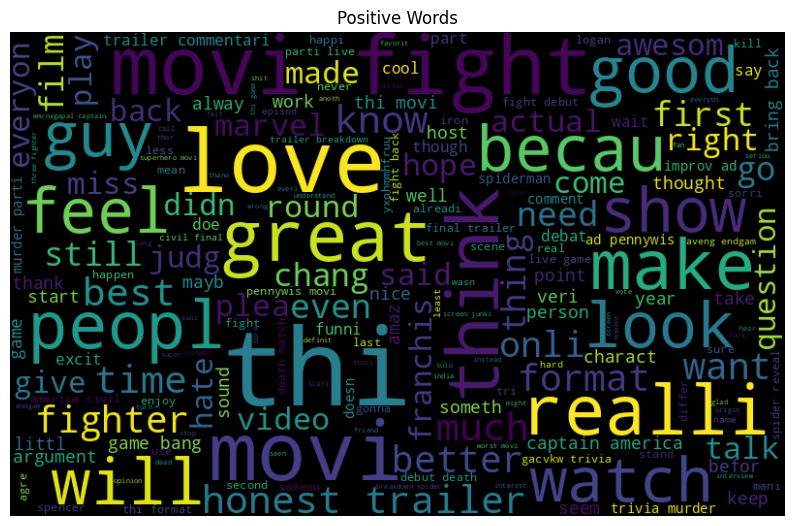

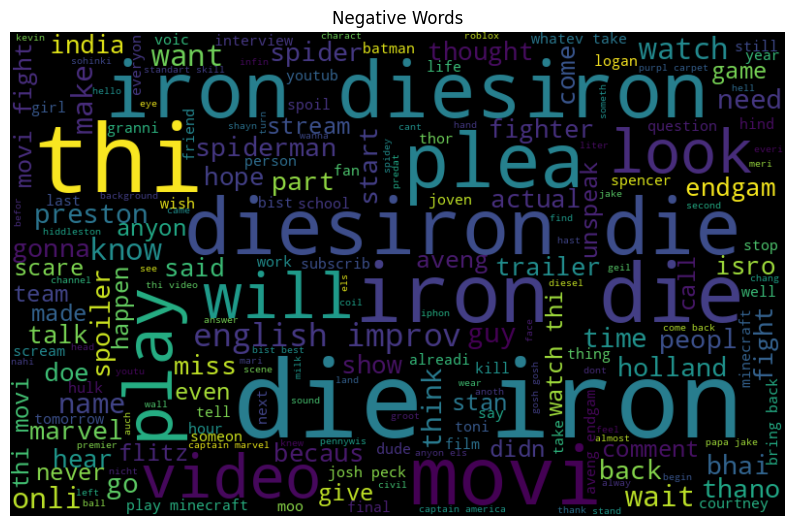

3. Feature Extraction from cleaned comment using Bag of Words
4. Dividing Data into Training and Test Sets
5. Building a SVM Model
6. Displaying the learning Curve


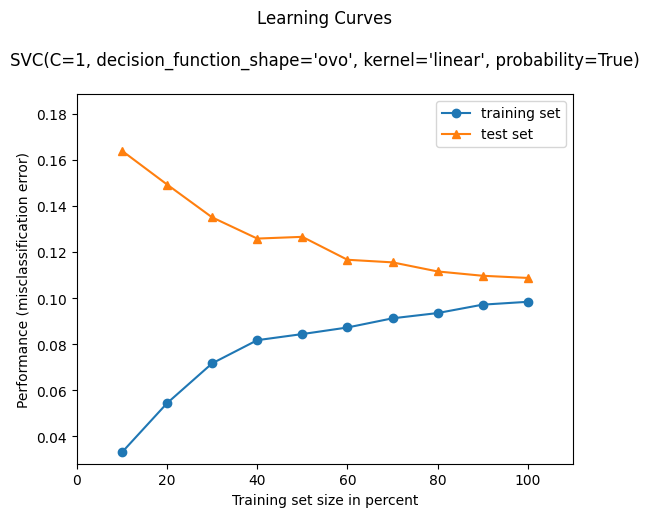

7. Displaying the Predicted Sentiment Analysis


<ipython-input-6-37d28f771382>:98: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)


	Total Predicted Positive Comments: 2680
	Total Predicted Negative Comments: 2643


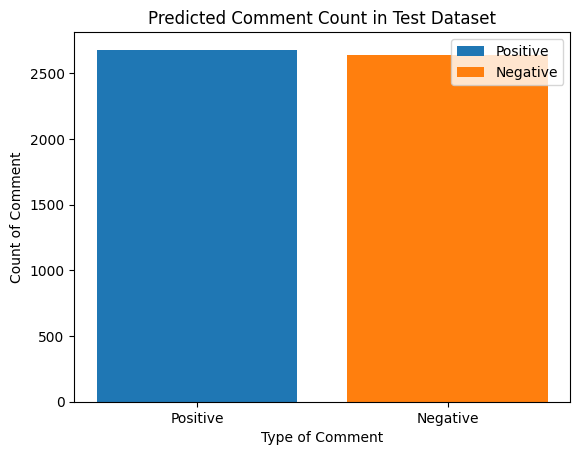

8. F1 Score of Classification
	F1 Score: 0.8933645027872685
9. Displaying Confusion Matrix of Classification


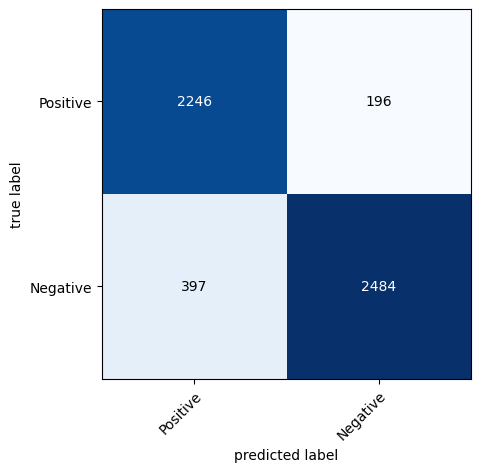

10. Classification Report for Trained SVM Model
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      2442
           1       0.93      0.86      0.89      2881

    accuracy                           0.89      5323
   macro avg       0.89      0.89      0.89      5323
weighted avg       0.89      0.89      0.89      5323

11. Area Under Receiver Operating Characteristic Curve (ROC) Score
	AUC ROC Score: 0.8909692722604905
12. Average Precision Score
	Average Precision Score: 0.8737261638096199
13. Accuracy Score of Trained SVM Model
	Accuracy Score: 0.8885966560210408
14. Brier Loss Score
	Brier Loss Score: 0.11140334397895924
15. Displaying ROC Curve


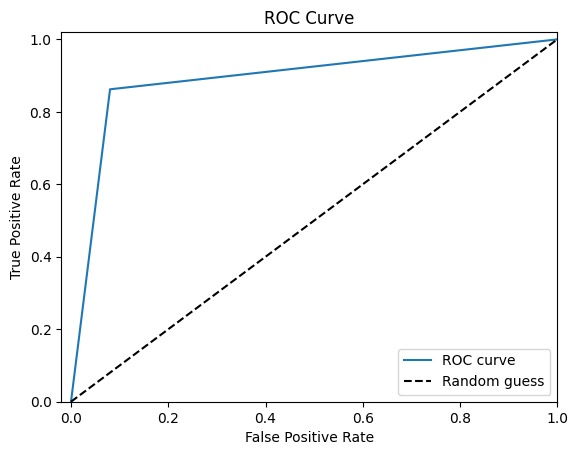

16. Displaying Precision Recall Curve


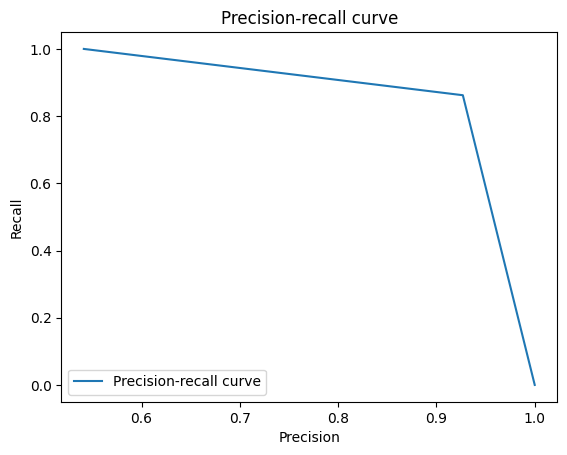

In [6]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from termcolor import colored, cprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score, average_precision_score,
    precision_recall_curve, accuracy_score, brier_score_loss
)
from sklearn import svm
from mlxtend.plotting import plot_confusion_matrix, plot_learning_curves
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

# Step 1: Loading Training and Test Dataset
cprint("Step 1 : Loading Training and Test Dataset", "red", attrs=["bold"])
print("\n")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(colored("Summary of Training data", "green", attrs=["bold"]))
print("\n")
print(train.describe(include="all"))
print("\n")
print(colored("Summary of Testing data", "green", attrs=["bold"]))
print("\n")
print(test.describe(include="all"))

# Step 2: Preprocessing of Data
cprint("Step 2 : Preprocessing of Data", "red", attrs=["bold"])
print("\n")
# 2.1 Removal of NA Values
cprint("2.1 Removal of NA Values", "green", attrs=["bold"])
train["Comment"] = train["Comment"].fillna("")
test["Comment"] = test["Comment"].fillna("")

# 2.2 Removing @mentions, Punctuations, Numbers and Special Characters
cprint("2.2 Removing @mentions, Punctuations, Numbers and Special Characters", "green", attrs=["bold"])
combi = train.append(test, ignore_index=True)
combi["Comment"] = combi["Comment"].str.replace("[^a-zA-Z#]", " ")

# 2.3 Removing Short Words length less than 2
cprint("2.3 Removing Short Words length less than 2", "green", attrs=["bold"])
combi["Comment"] = combi["Comment"].apply(lambda x: " ".join([w for w in x.split() if len(w) > 3]))

# 2.4 Applying Stemming on Comments
cprint("2.4 Applying Stemming on Comments", "green", attrs=["bold"])
stemmer = PorterStemmer()
combi["Comment"] = combi["Comment"].apply(lambda x: " ".join([stemmer.stem(i) for i in x.split()]))

all_words = " ".join([text for text in combi["Comment"]])

# Displaying Word Clouds
cprint("2.5 Displaying Word Clouds", "green", attrs=["bold"])
normal_words = " ".join([text for text in combi["Comment"][combi["polarity"] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Positive Words")
plt.axis("off")
plt.show()

negative_words = " ".join([text for text in combi["Comment"][combi["polarity"] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Negative Words")
plt.axis("off")
plt.show()

# Feature Extraction from cleaned comment using Bag of Words
cprint("3. Feature Extraction from cleaned comment using Bag of Words", "red", attrs=["bold"])
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words="english")
bow = bow_vectorizer.fit_transform(combi["Comment"])

# Dividing Data into Training and Test Sets
cprint("4. Dividing Data into Training and Test Sets", "red", attrs=["bold"])
train_bow = bow[:17741, :]
test_bow = bow[17742:, :]

xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train["polarity"], random_state=42, test_size=0.3)

# Building a SVM Model
cprint("5. Building a SVM Model", "red", attrs=["bold"])
svc = svm.SVC(kernel="linear", C=1, probability=True, decision_function_shape="ovo").fit(xtrain_bow, ytrain)

# Displaying the learning Curve
cprint("6. Displaying the learning Curve", "red", attrs=["bold"])
plot_learning_curves(xtrain_bow, ytrain, xvalid_bow, yvalid, svc)
plt.show()

# Displaying the Predicted Sentiment Analysis
cprint("7. Displaying the Predicted Sentiment Analysis", "red", attrs=["bold"])
prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(np.int)

positive_comments = np.count_nonzero(prediction_int == 1)
negative_comments = np.count_nonzero(prediction_int == 0)

print("\tTotal Predicted Positive Comments:", positive_comments)
print("\tTotal Predicted Negative Comments:", negative_comments)

plt.bar(["Positive"], [positive_comments], label="Positive")
plt.bar(["Negative"], [negative_comments], label="Negative")
plt.legend()
plt.xlabel("Type of Comment")
plt.ylabel("Count of Comment")
plt.title("Predicted Comment Count in Test Dataset")
plt.show()

# F1 Score of Classification
cprint("8. F1 Score of Classification", "red", attrs=["bold"])
f1 = f1_score(yvalid, prediction_int)
print("\tF1 Score:", f1)

# Displaying Confusion Matrix of Classification
cprint("9. Displaying Confusion Matrix of Classification", "red", attrs=["bold"])
confusion_mat = confusion_matrix(yvalid, prediction_int)
class_names = ["Positive", "Negative"]
plot_confusion_matrix(conf_mat=confusion_mat, class_names=class_names)
plt.show()

# Classification Report for Trained SVM Model
cprint("10. Classification Report for Trained SVM Model", "red", attrs=["bold"])
report = classification_report(yvalid, prediction_int)
print(report)

# Area Under Receiver Operating Characteristic Curve (ROC) Score
cprint("11. Area Under Receiver Operating Characteristic Curve (ROC) Score", "red", attrs=["bold"])
roc_auc = roc_auc_score(yvalid, prediction_int)
print("\tAUC ROC Score:", roc_auc)

# Average Precision Score
cprint("12. Average Precision Score", "red", attrs=["bold"])
avg_precision = average_precision_score(yvalid, prediction_int)
print("\tAverage Precision Score:", avg_precision)

# Accuracy Score of Trained SVM Model
cprint("13. Accuracy Score of Trained SVM Model", "red", attrs=["bold"])
acc_score = accuracy_score(yvalid, prediction_int)
print("\tAccuracy Score:", acc_score)

# Brier Loss Score
cprint("14. Brier Loss Score", "red", attrs=["bold"])
brier_loss = brier_score_loss(yvalid, prediction_int)
print("\tBrier Loss Score:", brier_loss)

# Displaying ROC Curve
cprint("15. Displaying ROC Curve", "red", attrs=["bold"])
fpr, tpr, thresholds = roc_curve(yvalid, prediction_int)
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0, 1], [0, 1], "k--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")
plt.show()

# Displaying Precision Recall Curve
cprint("16. Displaying Precision Recall Curve", "red", attrs=["bold"])
precision, recall, thresholds = precision_recall_curve(yvalid, prediction_int)
plt.plot(precision, recall, label="Precision-recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision-recall curve")
plt.legend(loc="lower left")
plt.show()
